In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jupyter as j
import importlib

def compare(files, thresh, text, ylabel, xlabel, ky, kx, ry, rx, overlays=['ublox', 'quectel'], graphs=['zte', 'nokia'], split=1, hist=False, bins=20, log=False):
    importlib.reload(j)
    j.compare(files, thresh, text, ylabel, xlabel, ky, kx, ry, rx, overlays, graphs, split, hist, bins, log)

custom jupyter @DanielRobinson


In [2]:
files = []
files.append(['release/release1/*','release/release16/*','release/release64/*','release/release128/*','release/release256/*','release/release512/*', 'release/release0/*'])
files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*'])
files.append(['drx/cap/*'])
files.append(['ptau/capture/*'])
files = sum(files, [])
print(files)

['release/release1/*', 'release/release16/*', 'release/release64/*', 'release/release128/*', 'release/release256/*', 'release/release512/*', 'release/release0/*', 'echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*', 'cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*', 'drx/cap/*', 'ptau/capture/*']


custom jupyter @DanielRobinson
9.999 324.8467
4.999 10.0
0.499 5.0
0.0877 0.5


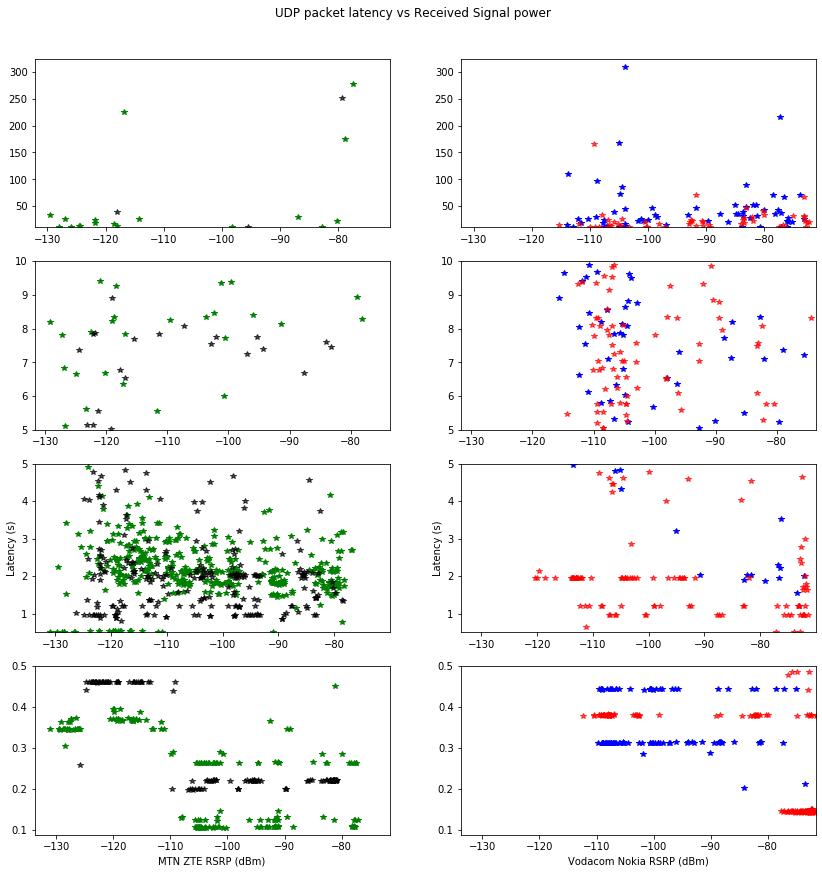

In [7]:
def thresh(a, key, split):
    a = np.array(a[key])
    r = a == a
    lim = [None, None]
    tsplit, slen = split
    if key == 'txTime':
        r *= a > 100
        limits = [10000, 5000, 500]
        r, lim = j.splitter(r, a, limits, split)
    elif key == 'Signal power':
        r *= a > -1350
        # lim = [-1300, -700]
    return r, lim
compare(files, thresh, 'UDP packet latency vs Received Signal power', 'Latency (s)', 'RSRP (dBm)', 'txTime', 'Signal power', 1000, 10, split=4)

In [13]:
plt.hist?

Signature:
plt.hist(
    x,
    bins=None,
    range=None,
    density=None,
    weights=None,
    cumulative=False,
    bottom=None,
    histtype='bar',
    align='mid',
    orientation='vertical',
    rwidth=None,
    log=False,
    color=None,
    label=None,
    stacked=False,
    normed=None,
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot a histogram.

Compute and draw the histogram of *x*.  The return value is a tuple
(*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
*patches1*,...]) if the input contains multiple data.  See the
documentation of the *weights* parameter to draw a histogram of
already-binned data.

Multiple data can be provided via *x* as a list of datasets
of potentially different length ([*x0*, *x1*, ...]), or as
a 2-D ndarray in which each column is a dataset.  Note that
the ndarray form is transposed relative to the list form.

Masked arrays are not supported at present.

Parameters
----------
x : (n,) array or sequence of (n,) arrays


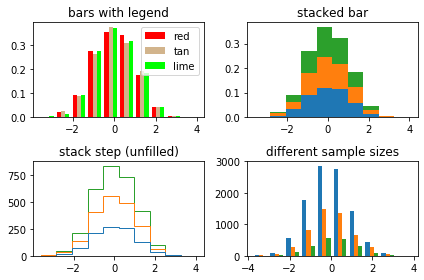

In [58]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=True, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

custom jupyter @DanielRobinson


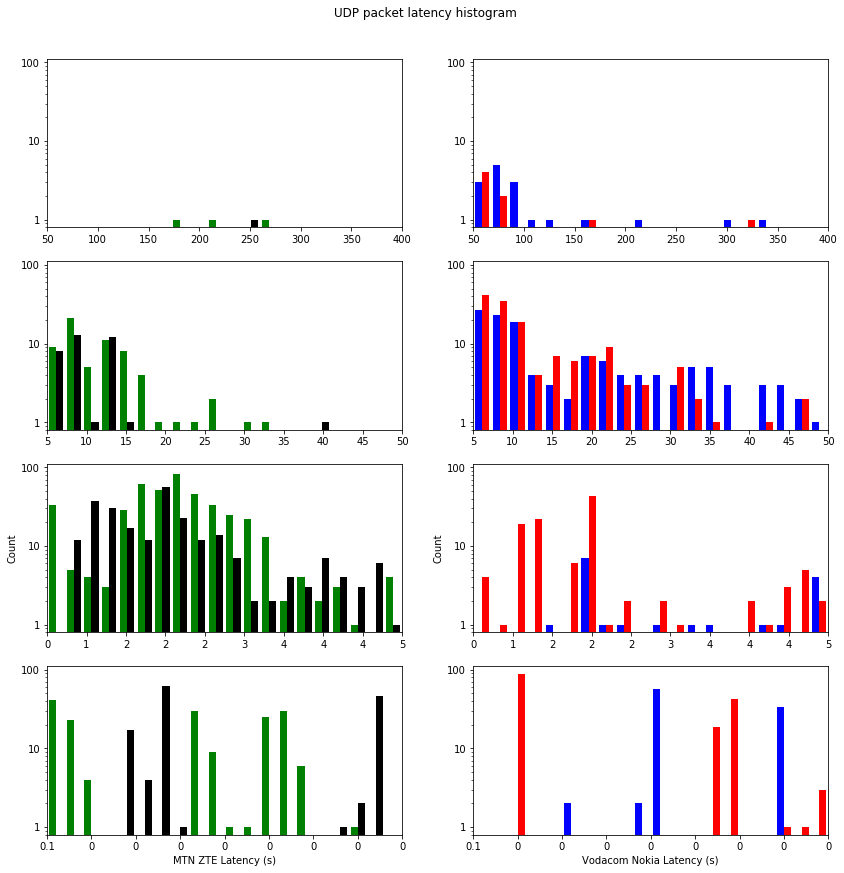

In [77]:
def thresh(a, key, split):
    a = np.array(a[key])
    r = a == a
    lim = [None, None]
    tsplit, slen = split
    if key == 'txTime':
        r *= a > 0
        limits = [400000, 50000, 5000, 500, 100]
        r, lim = j.splitter(r, a, limits, split, True)
    return r, lim
compare(files, thresh, 'UDP packet latency histogram', 'Count', 'Latency (s)', 'txTime', 'Signal power', 1000, 10, split=4, hist=True, log=True)

custom jupyter @DanielRobinson


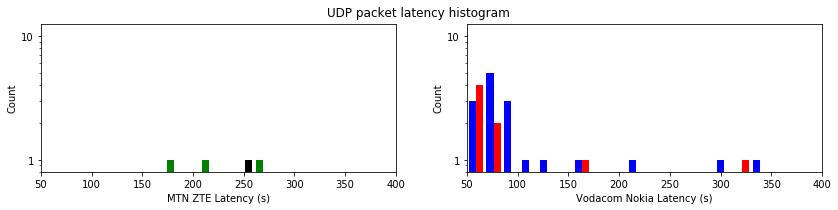

In [79]:
def thresh(a, key, split):
    a = np.array(a[key])
    r = a == a
    lim = [None, None]
    tsplit, slen = split
    if key == 'txTime':
        r *= a > 0
        # limits = [50000, 5000, 500]
        limits = [400000, 50000, 5000, 500, 100]
        r, lim = j.splitter(r, a, limits, split, True)
    return r, lim
compare(files, thresh, 'UDP packet latency histogram', 'Count', 'Latency (s)', 'txTime', 'Signal power', 1000, 10, split=1, hist=True, log=True)

custom jupyter @DanielRobinson


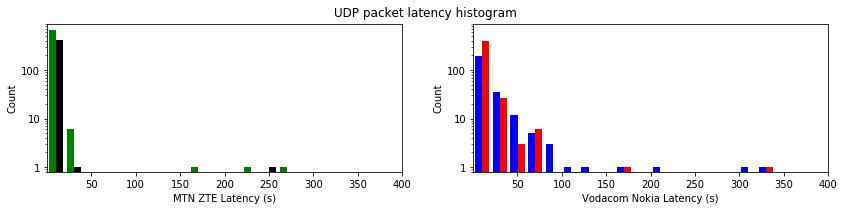

In [145]:
def thresh(a, key, split):
    a = np.array(a[key])
    r = a == a
    lim = [None, None]
    tsplit, slen = split
    if key == 'txTime':
        r *= a > 0
        # limits = [50000, 5000, 500]
        limits = [400000, 50000, 5000, 500, 100]
        r, lim = j.splitter(r, a, limits, split, True)
    return r, lim
compare(files, thresh, 'UDP packet latency histogram', 'Count', 'Latency (s)', 'txTime', 'Signal power', 1000, 10, split=1, hist=True, log=True)

custom jupyter @DanielRobinson
dirr logs/zte_mtn/rf_shield/ublox/
dirr logs/zte_mtn/rf_shield/quectel/
dirr logs/nokia_vodacom/centurycity/ublox/
dirr logs/nokia_vodacom/centurycity/quectel/


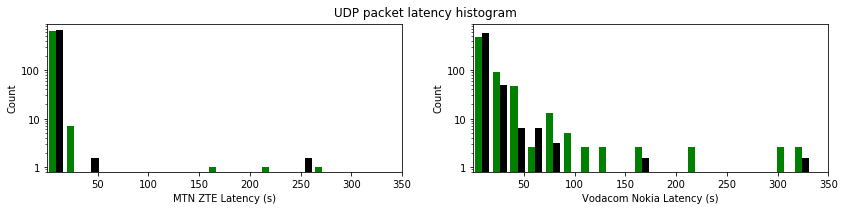

In [19]:
ykey = 'txTime'
xkey = 'Signal power'
def thresh(a, key, split):
    a = np.array(a[key])
    r = a == a
    lim = [None, None]
    tsplit, slen = split
    if key == 'txTime':
        r *= a > 0
#         limits = [400000, 100]
        limits = [350000, 50000, 5000, 500, 100]
        r, lim = j.splitter(r, a, limits, split, True)
#     elif key == 'Signal power':
#         r *= a > -1350
#         # lim = [-1300, -700]
    return r, lim
compare(files, thresh, 'UDP packet latency histogram', 'Count', 'Latency (s)', ykey, xkey, 1000, 10, split=1, hist=True, log=True)

custom jupyter @DanielRobinson
dirr logs/zte_mtn/rf_shield/ublox/
dirr logs/zte_mtn/rf_shield/quectel/
dirr logs/nokia_vodacom/centurycity/ublox/
dirr logs/nokia_vodacom/centurycity/quectel/


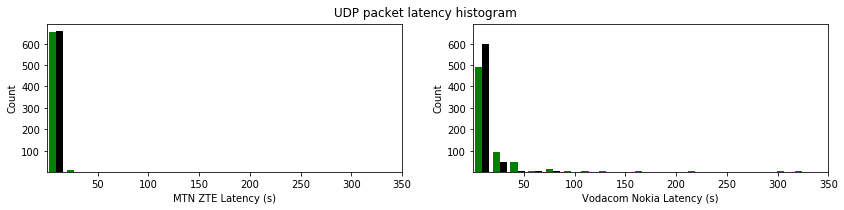

In [20]:
compare(files, thresh, 'UDP packet latency histogram', 'Count', 'Latency (s)', 'txTime', 'Signal power', 1000, 10, split=1, hist=True)

custom jupyter @DanielRobinson
dirr logs/zte_mtn/rf_shield/ublox/
dirr logs/zte_mtn/rf_shield/quectel/
dirr logs/nokia_vodacom/centurycity/ublox/
dirr logs/nokia_vodacom/centurycity/quectel/


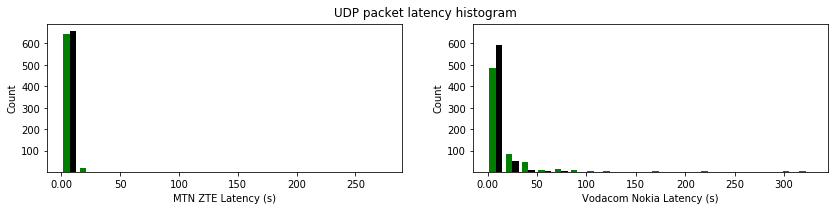

In [21]:
def thresh(a, key, split):
    a = np.array(a[key])
    r = a == a
    lim = [None, None]
    if key == 'txTime':
        r *= a > 100
    return r, lim
compare(files, thresh, 'UDP packet latency histogram', 'Count', 'Latency (s)', 'txTime', 'Signal power', 1000, 10, split=1, hist=True)

In [184]:
max([1,2,3,5,6,3,])

6

In [167]:
a = [[1,1], [2,2,2,2,2]]
b = [len(a) for a in a]
print()
[[1 * b[-1] / c] * c for c in b]

[[2.5, 2.5], [1.0, 1.0, 1.0, 1.0, 1.0]]

In [183]:
b = np.array([[4,6], [5,3]])
print(b)
# [[1 * b[-1] / c] * c for c in b]

[[4 6]
 [5 3]]


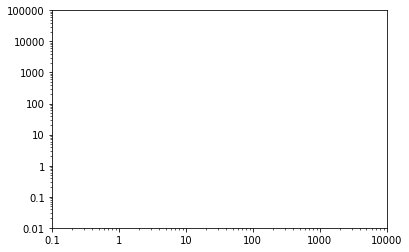

In [110]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
ax.axis([0.1, 10000, 0.01, 100000])
ax.loglog()

from matplotlib.ticker import ScalarFormatter
for axis in [ax.xaxis, ax.yaxis]:
    # axis.set_major_formatter(ScalarFormatter())
    axis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(max(y, 0.01)),0)))).format(y)))
    
plt.show()

In [94]:
l = lambda y: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)

In [98]:
l(0.00001)

'0.00001'

In [109]:
y = 0.000001
int(np.maximum(-np.log10(max(y, 0.01)),0))

2